# Data cleaning

In [1]:
# Files
file  = 'netflix1.csv'

# import pandas and numpy
import pandas as pd 
import numpy as np
df = pd.read_csv(file)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [3]:
# drop columns
df.columns 
keep_coluns = ['type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating']
drop_columns = ['duration', 'listed_in']
df = df.drop(columns = drop_columns)

In [4]:
# Standardizing show_id
df['show_id'] = df['show_id'].str.replace('s','')

In [5]:
# handle missing value
df.isna().sum() # no missing value

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
dtype: int64

In [6]:
# handle duplicate
df.duplicated().value_counts() # No duplicate

False    8790
Name: count, dtype: int64

In [40]:
# standardizing columns name 

rename_dict = {'show_id': 'show id', 'date_added': 'date added', 'release_year': 'release year'}
df.rename(columns = (rename_dict), inplace = True)
df.columns = df.columns.str.title()

# standardizing column type
# show id 
df['Show Id'] = df['Show Id'].astype(int)

# Date added
df['Date Added'] = pd.to_datetime(df['Date Added'])

In [60]:
# sort values and  reset index 

df = df.sort_values(by = 'Show Id')
df = df.reset_index (drop = True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show Id       8790 non-null   int32         
 1   Type          8790 non-null   object        
 2   Title         8790 non-null   object        
 3   Director      8790 non-null   object        
 4   Country       8790 non-null   object        
 5   Date Added    8790 non-null   datetime64[ns]
 6   Release Year  8790 non-null   int64         
 7   Rating        8790 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(5)
memory usage: 515.2+ KB


In [68]:
# export
# df.to_csv('C:\\Temp\\Netflix_Cleaned.csv', index=False)

# Exploratory data analysis

In [72]:
file = 'Netflix_Cleaned.csv'
# import library again 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# import data set 
df = pd.read_csv(file)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show Id       8790 non-null   int64 
 1   Type          8790 non-null   object
 2   Title         8790 non-null   object
 3   Director      8790 non-null   object
 4   Country       8790 non-null   object
 5   Date Added    8790 non-null   object
 6   Release Year  8790 non-null   int64 
 7   Rating        8790 non-null   object
dtypes: int64(2), object(6)
memory usage: 549.5+ KB


In [82]:
# standardizing date type 
df['Date Added'] = pd.to_datetime(df['Date Added'])

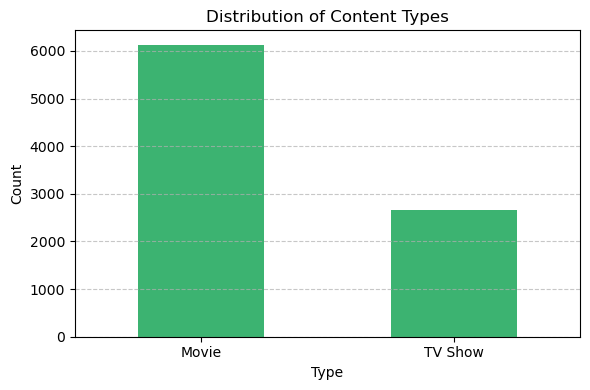

In [154]:
# Type Distribution 
counts = df['Type'].value_counts()

# visualization
plt.figure(figsize = (6,4))
type_counts.plot(kind = 'bar', color = ['mediumseagreen', 'mediumseagreen'])
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

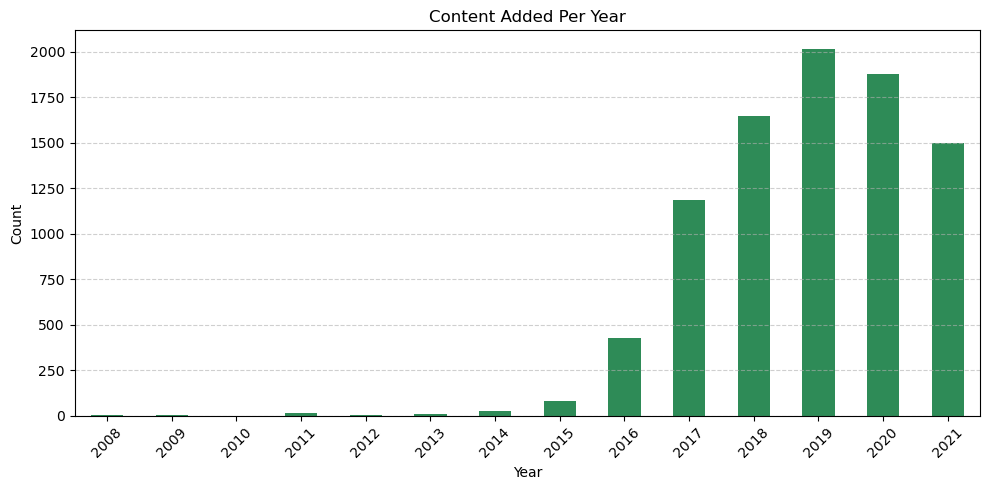

In [150]:
# Content added over time 
years = df['Date Added'].dt.year
yearly_added = years.value_counts().sort_index()

# visualization 
plt.figure(figsize = (10, 5))
yearly_added.plot(kind = 'bar', color = 'seagreen')
plt.title('Content Added Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

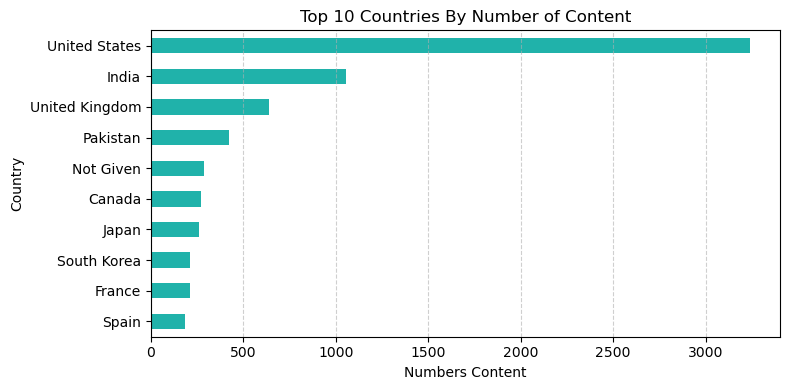

In [180]:
# Top content by country 
countries = df['Country'].value_counts().head(10)

# visualization
plt.figure(figsize = (8, 4))
countries.plot(kind = 'barh', color = 'lightseagreen')
plt.title('Top 10 Countries By Number of Content')
plt.xlabel('Numbers Content')
plt.gca().invert_yaxis()
plt.grid(axis = 'x', linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

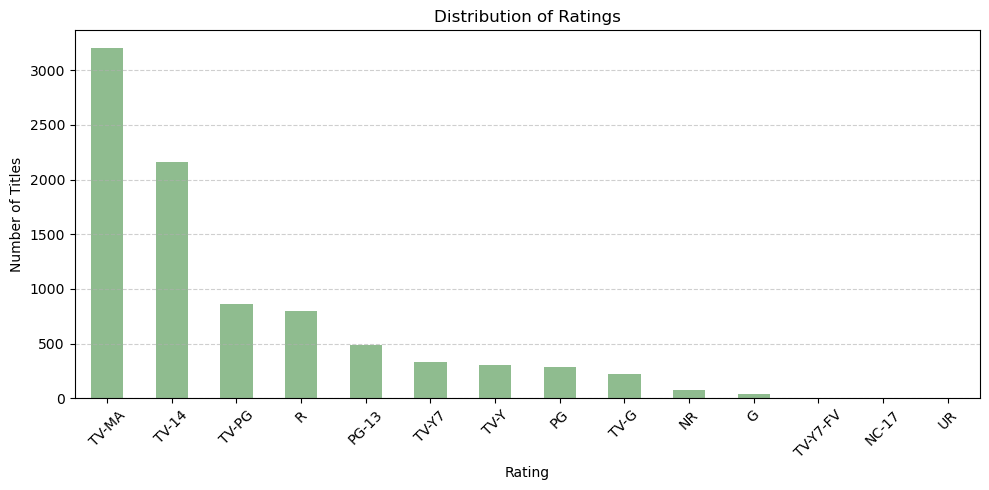

In [192]:
# Rating Distribution 
rating = df['Rating'].value_counts()

# visualization
plt.figure(figsize = (10, 5))
rating.plot(kind = 'bar', color = 'darkseagreen')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

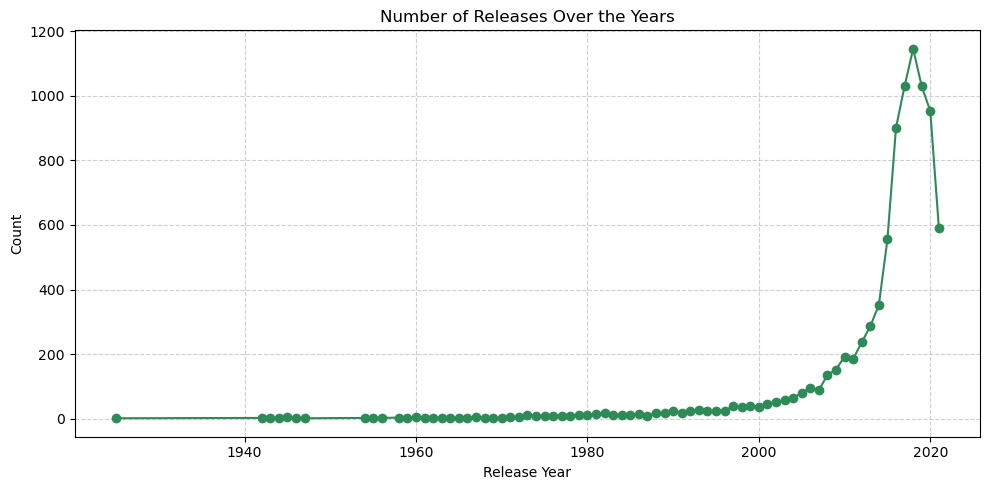

In [216]:
# Release Year Trend
release = df['Release Year'].value_counts().sort_index()

plt.figure(figsize = (10, 5))
release.plot(kind = 'line', marker = 'o', color = 'seagreen')
plt.title('Number of Releases Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()